Частина третя: Аналіз датасет c Kaggle.com

У цій частині домашньої роботи ми ще більше заглибимося в бібліотеку pandas та розглянемо просунутіші функції.

Для цієї вправи ми використовуємо дані за Топ-50 рейтингом книг, що найбільше продаються на Amazon за 11 років (з 2009 по 2019). Датасет знаходиться у відкритому доступі на Kaggle.com. Завантажте файл csv за посиланням і перемістіть його в ту саму директорію, де знаходиться ваш робочий ноутбук (для зручності). Після цього переходьте до завдання

Для виконання цієї частини домашнього завдання потрібно буде не тільки написати код, а й відповісти на супутні запитання. Там, де ви побачите виділений жирним шрифтом напис відповідь: потрібно буде вставити питання у файл і відповідь на нього.

1) Первинне дослідження даних

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
file_path = 'data/bestsellers with categories.csv'
df = pd.read_csv(file_path)
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


- Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [122]:
missing_values = df.isna().sum()
print(f"Відсутні значення в кожному стовпці:") 
missing_values


Відсутні значення в кожному стовпці:


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

- Відповідь: Чи є в якихось змінних пропуски? (Так / ні)

In [121]:
any_missing = any(missing_values > 0)
print(f"Чи є в якихось змінних пропуски?:\n {'Yes' if any_missing else 'No'}")

Чи є в якихось змінних пропуски?:
 No


- Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [77]:
unique_genres = df['genre'].unique()

- Відповідь: Які є унікальні жанри?

In [78]:
unique_genres


Unique genres: ['Non Fiction' 'Fiction']


- Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

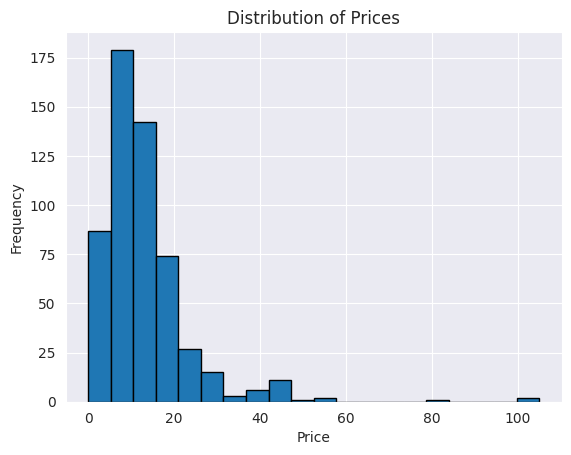

In [79]:
df['price'].plot(kind='hist', bins=20, edgecolor='black', grid=True, title='Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

- Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [80]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

- Відповідь: Максимальна ціна?

In [81]:
print(f"\nMaximum price: {max_price}")


Maximum price: 105


- Відповідь: Мінімальна ціна?

In [82]:
print(f"Minimum price: {min_price}")

Minimum price: 0


- Відповідь: Середня ціна?

In [83]:
print(f"Mean price: {mean_price}")

Mean price: 13.1


- Відповідь: Медіанна ціна?

In [84]:
print(f"Median price: {median_price}")

Median price: 11.0


2) Пошук та сортування даних

-     Відповідь: Який рейтинг у датасеті найвищий? Відповідь:

In [85]:
max_rating = df['user_rating'].max()
print(f"Найвищий рейтинг у датасеті: {max_rating}")

Найвищий рейтинг у датасеті: 4.9


-     Відповідь: Скільки книг мають такий рейтинг? Відповідь:

In [86]:
count_max_rating = df[df['user_rating'] == max_rating].shape[0]
print(f"Кількість книг із найвищим рейтингом: {count_max_rating}")

Кількість книг із найвищим рейтингом: 52


-     Відповідь: Яка книга має найбільше відгуків? Відповідь:

In [87]:
max_reviews_book = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
print(f"Книга з найбільшою кількістю відгуків: {max_reviews_book}")

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


-     Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:

In [88]:
df_2015 = df[df['year'] == 2015]
most_expensive_2015 = df_2015[df_2015['price'] == df_2015['price'].max()]['name'].values[0]
print(f"Найдорожча книга, що потрапила до Топ-50 у 2015 році: {most_expensive_2015}")

Найдорожча книга, що потрапила до Топ-50 у 2015 році: Publication Manual of the American Psychological Association, 6th Edition


-     Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:

In [89]:
count_fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)].shape[0]
print(f"Кількість книг жанру Fiction у Топ-50 у 2010 році: {count_fiction_2010}")

Кількість книг жанру Fiction у Топ-50 у 2010 році: 20


-     Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:

In [90]:
count_high_rated_books = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(f"Кількість книг з рейтингом 4.9 у Топ-50 у 2010 та 2011 роках: {count_high_rated_books}")

Кількість книг з рейтингом 4.9 у Топ-50 у 2010 та 2011 роках: 1


-     І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [91]:
sorted_books = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
sorted_books

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

-     Відповідь: Яка книга остання у відсортованому списку? Відповідь:


In [92]:
last_book = sorted_books.iloc[-1]['name']
print(f"Остання книга у відсортованому списку: {last_book}")

Остання книга у відсортованому списку: Old School (Diary of a Wimpy Kid #10)


3)  Агрегування даних та з'єднання таблицьОстання секція цього домашнього завдання включає просунутіші функції. Але не хвилюйтеся, pandas робить усі операції простими та зрозумілими.

-       Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні ва

In [93]:

genre_prices = df.groupby('genre').agg({'price': ['max', 'min']})
print(genre_prices)

max_price_fiction = genre_prices.loc['Fiction', ('price', 'max')]
min_price_fiction = genre_prices.loc['Fiction', ('price', 'min')]
max_price_non_fiction = genre_prices.loc['Non Fiction', ('price', 'max')]
min_price_non_fiction = genre_prices.loc['Non Fiction', ('price', 'min')]

print(f"Максимальна ціна для жанру Fiction: {max_price_fiction}")
print(f"Мінімальна ціна для жанру Fiction: {min_price_fiction}")
print(f"Максимальна ціна для жанру Non Fiction: {max_price_non_fiction}")
print(f"Мінімальна ціна для жанру Non Fiction: {min_price_non_fiction}")

            price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0
Максимальна ціна для жанру Fiction: 82
Мінімальна ціна для жанру Fiction: 0
Максимальна ціна для жанру Non Fiction: 105
Мінімальна ціна для жанру Non Fiction: 0


-   Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [94]:
author_books_count = df.groupby('author').agg({'name': 'count'}).reset_index()
author_books_count.columns = ['author', 'book_count']

table_shape = author_books_count.shape
author_most_books = author_books_count.loc[author_books_count['book_count'].idxmax(), 'author']
most_books_count = author_books_count['book_count'].max()

print(f"Розмірність таблиці: {table_shape}")
print(f"Автор з найбільшою кількістю книг: {author_most_books}")
print(f"Кількість книг цього автора: {most_books_count}")

Розмірність таблиці: (248, 2)
Автор з найбільшою кількістю книг: Jeff Kinney
Кількість книг цього автора: 12


-   Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [95]:
author_avg_rating = df.groupby('author').agg({'user_rating': 'mean'}).reset_index()
author_avg_rating.columns = ['author', 'avg_rating']

# Відповіді на запитання
min_avg_author = author_avg_rating.loc[author_avg_rating['avg_rating'].idxmin(), 'author']
min_avg_rating = author_avg_rating['avg_rating'].min()

print(f"Автор з мінімальним середнім рейтингом: {min_avg_author}")
print(f"Середній рейтинг для цього автора: {min_avg_rating}")

Автор з мінімальним середнім рейтингом: Donna Tartt
Середній рейтинг для цього автора: 3.9


-   З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [96]:
author_count_books = df.groupby('author')['name'].count().reset_index()
author_count_books.columns = ['author', 'book_count']

merged_df = pd.concat([author_count_books, author_avg_rating['avg_rating']], axis=1)
merged_df.head()

                       author  book_count  avg_rating
0            Abraham Verghese           2         4.6
1              Adam Gasiewski           1         4.4
2               Adam Mansbach           1         4.8
3                   Adir Levy           1         4.8
4  Admiral William H. McRaven           1         4.7


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

Відповідь: Який автор перший у списку?

In [101]:
sorted_df = merged_df.sort_values(by=['book_count', 'avg_rating'], ascending=[True, True])

first_author = sorted_df.iloc[0]['author']
first_author

Muriel Barbery


    Графік розподілу цін на книги       

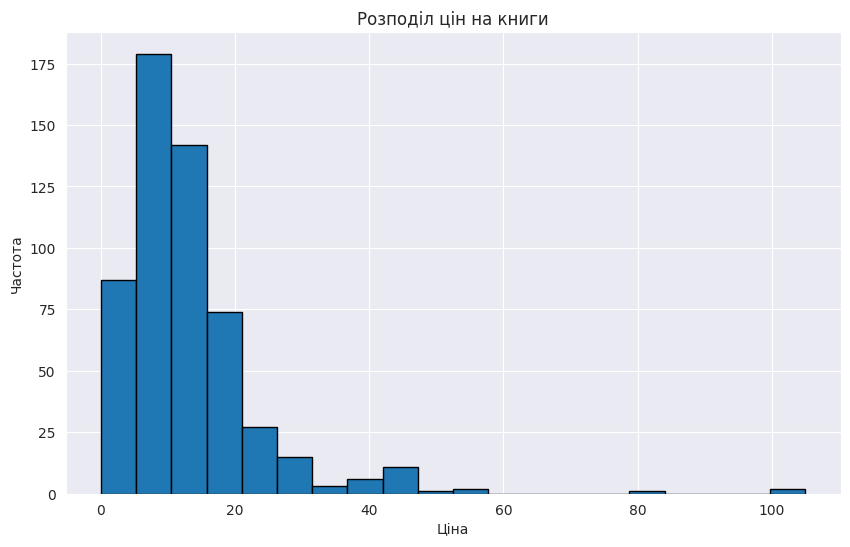

In [109]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10, 6))
df['price'].plot(kind='hist', bins=20, edgecolor='black', grid=True)
plt.title('Розподіл цін на книги')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.show()

    Графік розподілу жанрів книг:

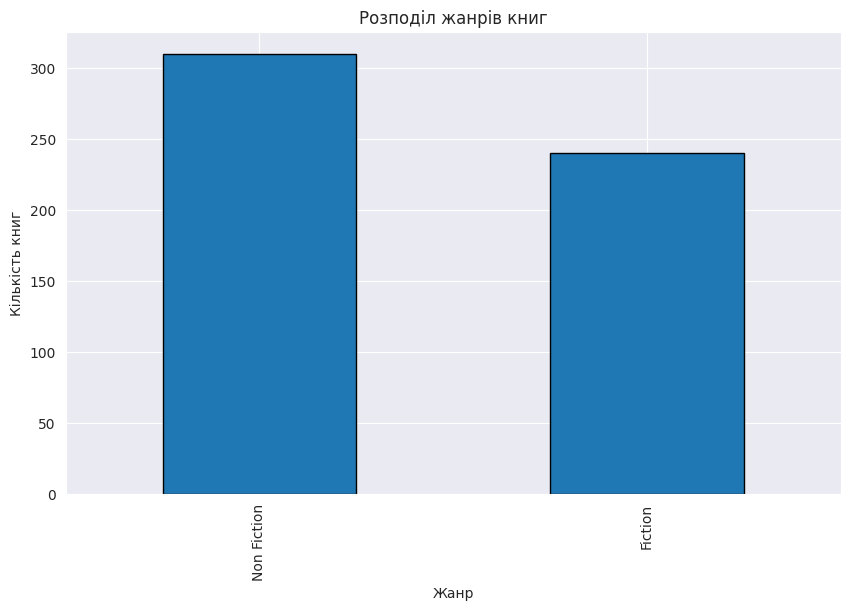

In [117]:
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', edgecolor='black', grid=True)
plt.title('Розподіл жанрів книг')
plt.xlabel('Жанр')
plt.ylabel('Кількість книг')
plt.show()

    Графік середньго рейтингу за авторами 

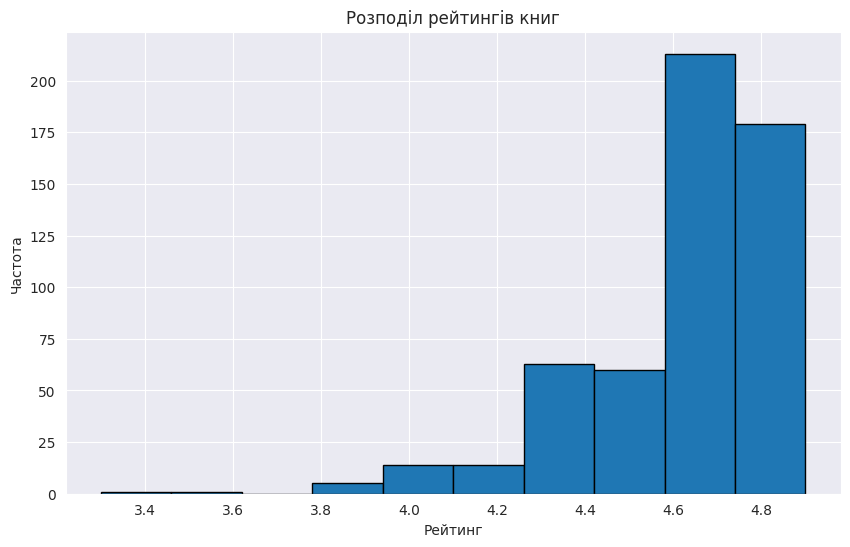

In [116]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10, 6))
df['user_rating'].hist(bins=10, edgecolor='black', grid=True)
plt.title('Розподіл рейтингів книг')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()

        Графік зв'язок між рейтингом та ціною книг:

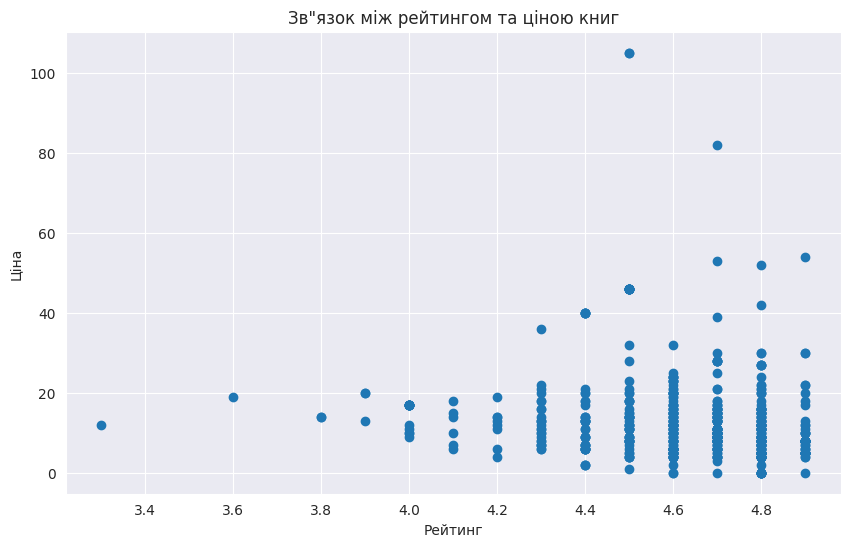

In [118]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10, 6))
plt.scatter(df['user_rating'], df['price'])
plt.title('Зв"язок між рейтингом та ціною книг')
plt.xlabel('Рейтинг')
plt.ylabel('Ціна')
plt.show()

    Графік зв'язок між жанром та ціною книг

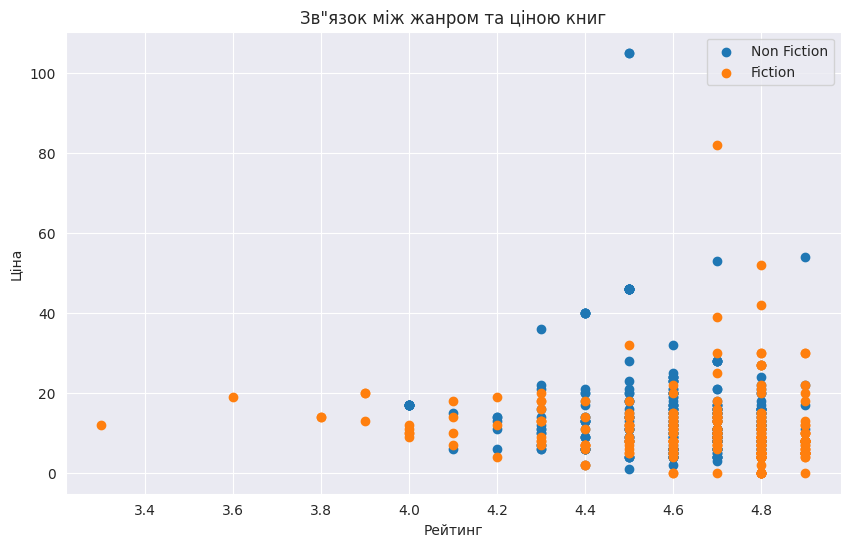

In [119]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10, 6))
for genre in df['genre'].unique():
    df_filtered = df[df['genre'] == genre]
    plt.scatter(df_filtered['user_rating'], df_filtered['price'], label=genre)
plt.title('Зв"язок між жанром та ціною книг')
plt.xlabel('Рейтинг')
plt.ylabel('Ціна')
plt.legend()
plt.show()